In [11]:
!pip install yfinance
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL with the revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Parse the correct table (Tesla revenue)
# Based on inspection, it’s the second table on the page
tesla_revenue_table = tables[1]  # change the index if necessary
df_tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

# Clean the data
df_tesla_revenue.columns = ['Date', 'Revenue']
df_tesla_revenue.dropna(inplace=True)
df_tesla_revenue = df_tesla_revenue[df_tesla_revenue['Revenue'] != "$-"]
df_tesla_revenue['Revenue'] = df_tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
df_tesla_revenue['Revenue'] = pd.to_numeric(df_tesla_revenue['Revenue'])
df_tesla_revenue['Date'] = pd.to_datetime(df_tesla_revenue['Date'])

# Print the cleaned data
print(df_tesla_revenue.head())


<>:24: SyntaxWarning: invalid escape sequence '\$'
<>:24: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Lula\AppData\Local\Temp\ipykernel_17300\2821379943.py:24: SyntaxWarning: invalid escape sequence '\$'
  df_tesla_revenue['Revenue'] = df_tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
C:\Users\Lula\AppData\Local\Temp\ipykernel_17300\2821379943.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]


        Date  Revenue
0 2022-09-30    21454
1 2022-06-30    16934
2 2022-03-31    18756
3 2021-12-31    17719
4 2021-09-30    13757


In [13]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Fetch HTML
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find tables
tables = soup.find_all("table")
tesla_revenue_table = tables[1]  # Adjust if necessary

# Use StringIO to avoid future warning
html_table = str(tesla_revenue_table)
df_tesla_revenue = pd.read_html(StringIO(html_table))[0]

# Clean data
df_tesla_revenue.columns = ['Date', 'Revenue']
df_tesla_revenue.dropna(inplace=True)
df_tesla_revenue = df_tesla_revenue[df_tesla_revenue['Revenue'] != "$-"]
df_tesla_revenue['Revenue'] = df_tesla_revenue['Revenue'].replace({r'\$': '', ',': ''}, regex=True)
df_tesla_revenue['Revenue'] = pd.to_numeric(df_tesla_revenue['Revenue'])
df_tesla_revenue['Date'] = pd.to_datetime(df_tesla_revenue['Date'])

print(df_tesla_revenue.head())


        Date  Revenue
0 2022-09-30    21454
1 2022-06-30    16934
2 2022-03-31    18756
3 2021-12-31    17719
4 2021-09-30    13757


In [15]:
!pip install yfinance
import yfinance as yf

# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Get historical stock data (e.g., daily data for the past 5 years)
gme_history = gme.history(period="5y")

# Show the first few rows
print(gme_history.head())

                             Open    High     Low   Close    Volume  \
Date                                                                  
2020-05-11 00:00:00-04:00  1.2300  1.2400  1.1875  1.1900   6796800   
2020-05-12 00:00:00-04:00  1.1950  1.2300  1.1150  1.1350  10556800   
2020-05-13 00:00:00-04:00  1.1350  1.1350  1.0175  1.0525  11531600   
2020-05-14 00:00:00-04:00  1.0375  1.0475  0.9900  1.0325   8019600   
2020-05-15 00:00:00-04:00  1.0125  1.1125  1.0100  1.0550   7762400   

                           Dividends  Stock Splits  
Date                                                
2020-05-11 00:00:00-04:00        0.0           0.0  
2020-05-12 00:00:00-04:00        0.0           0.0  
2020-05-13 00:00:00-04:00        0.0           0.0  
2020-05-14 00:00:00-04:00        0.0           0.0  
2020-05-15 00:00:00-04:00        0.0           0.0  


In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Load the HTML from the provided URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables
tables = soup.find_all("table")

# GameStop revenue is in the second table (index 1)
gamestop_table_html = str(tables[1])
df_gme = pd.read_html(StringIO(gamestop_table_html))[0]

# Clean the data
df_gme.columns = ['Date', 'Revenue']
df_gme.dropna(inplace=True)
df_gme = df_gme[df_gme['Revenue'] != "$-"]
df_gme['Revenue'] = df_gme['Revenue'].replace({r'\$': '', ',': ''}, regex=True)
df_gme['Revenue'] = pd.to_numeric(df_gme['Revenue'])
df_gme['Date'] = pd.to_datetime(df_gme['Date'])

# Display result
print(df_gme.head())




        Date  Revenue
0 2022-09-30    21454
1 2022-06-30    16934
2 2022-03-31    18756
3 2021-12-31    17719
4 2021-09-30    13757


Matplotlib is building the font cache; this may take a moment.


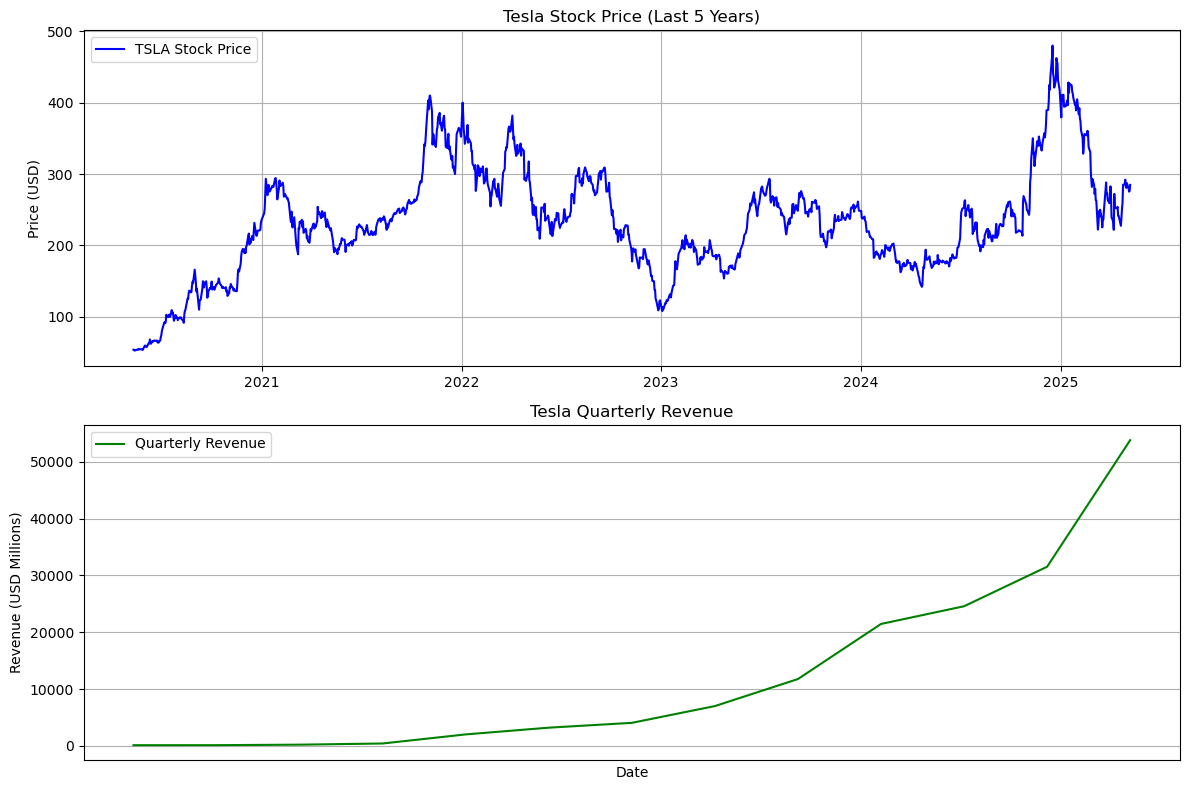

In [17]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from io import StringIO

# ----------------------------
# 1. Get Tesla Stock Data
# ----------------------------
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="5y")

# ----------------------------
# 2. Get Tesla Revenue Data
# ----------------------------
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all("table")
tesla_table_html = str(tables[0])  # Tesla is in the first table
df_revenue = pd.read_html(StringIO(tesla_table_html))[0]

# Clean Revenue Data
df_revenue.columns = ['Date', 'Revenue']
df_revenue.dropna(inplace=True)
df_revenue = df_revenue[df_revenue['Revenue'] != "$-"]
df_revenue['Revenue'] = df_revenue['Revenue'].replace({r'\$': '', ',': ''}, regex=True)
df_revenue['Revenue'] = pd.to_numeric(df_revenue['Revenue'])
df_revenue['Date'] = pd.to_datetime(df_revenue['Date'])

# ----------------------------
# 3. Plotting Dashboard
# ----------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# Stock Closing Price
ax1.plot(tesla_stock.index, tesla_stock['Close'], label='TSLA Stock Price', color='blue')
ax1.set_title("Tesla Stock Price (Last 5 Years)")
ax1.set_ylabel("Price (USD)")
ax1.grid(True)
ax1.legend()

# Revenue Plot
ax2.plot(df_revenue['Date'], df_revenue['Revenue'], label='Quarterly Revenue', color='green')
ax2.set_title("Tesla Quarterly Revenue")
ax2.set_ylabel("Revenue (USD Millions)")
ax2.set_xlabel("Date")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


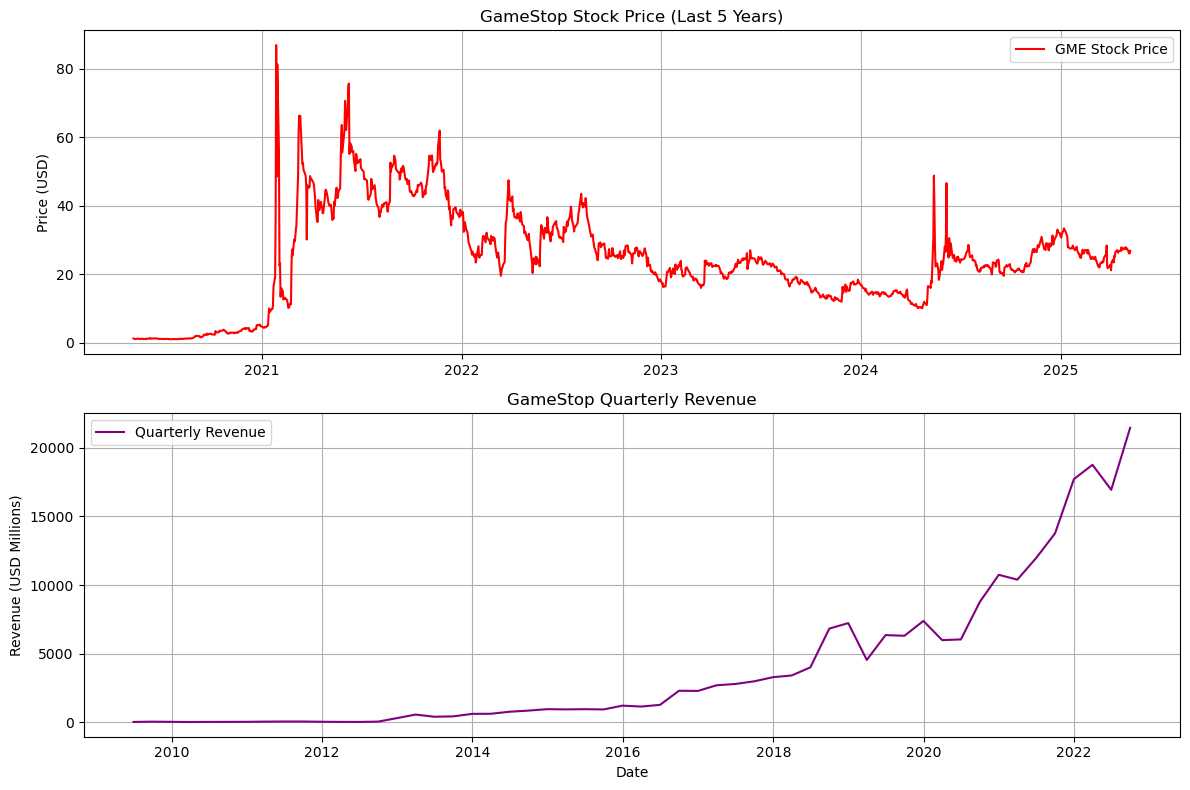

In [20]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from io import StringIO

# ----------------------------
# 1. Get GameStop Stock Data
# ----------------------------
gme = yf.Ticker("GME")
gme_stock = gme.history(period="5y")

# ----------------------------
# 2. Scrape GameStop Revenue Data
# ----------------------------
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all("table")
gme_table_html = str(tables[1])  # GameStop revenue table is second
df_gme_revenue = pd.read_html(StringIO(gme_table_html))[0]

# Clean Revenue Data
df_gme_revenue.columns = ['Date', 'Revenue']
df_gme_revenue.dropna(inplace=True)
df_gme_revenue = df_gme_revenue[df_gme_revenue['Revenue'] != "$-"]
df_gme_revenue['Revenue'] = df_gme_revenue['Revenue'].replace({r'\$': '', ',': ''}, regex=True)
df_gme_revenue['Revenue'] = pd.to_numeric(df_gme_revenue['Revenue'])
df_gme_revenue['Date'] = pd.to_datetime(df_gme_revenue['Date'])

# ----------------------------
# 3. Plotting Dashboard
# ----------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# Plot 1: Stock Price
ax1.plot(gme_stock.index, gme_stock['Close'], label='GME Stock Price', color='red')
ax1.set_title("GameStop Stock Price (Last 5 Years)")
ax1.set_ylabel("Price (USD)")
ax1.grid(True)
ax1.legend()

# Plot 2: Revenue
ax2.plot(df_gme_revenue['Date'], df_gme_revenue['Revenue'], label='Quarterly Revenue', color='purple')
ax2.set_title("GameStop Quarterly Revenue")
ax2.set_ylabel("Revenue (USD Millions)")
ax2.set_xlabel("Date")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()
